## Quick Start Tutorial - Distinctiveness Centrality (Python)
**More info here https://github.com/iandreafc/distinctiveness**

### Installation
``` python
pip install -U distinctiveness
```

In [1]:
# Import
from distinctiveness.dc import dc_all

#Import Networkx and Pandas
import networkx as nx
import pandas as pd

### Undirected graphs

{('A', 'E'): Text(-0.7646620957941159, 0.05403264819481606, '5'),
 ('A', 'B'): Text(-0.07630869193853129, -0.06340082066910156, '2'),
 ('B', 'F'): Text(0.6200740261383412, -0.19961267273027536, '5'),
 ('B', 'C'): Text(0.21238498125312635, -0.08846874987154167, '2'),
 ('B', 'D'): Text(0.30890989611381764, 0.09718476989413913, '2'),
 ('C', 'D'): Text(0.14458806965577486, 0.1455800245354595, '5')}

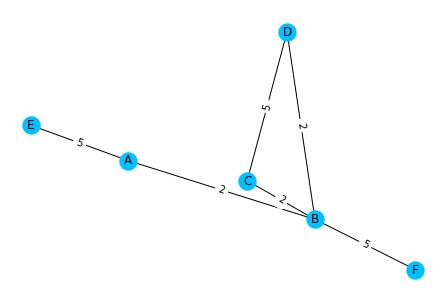

In [2]:
#Create a Toy Network
G= nx.Graph()
G.add_edge("A","E", weight = 5)
G.add_edge("A","B", weight = 2)
G.add_edge("B","F", weight = 5)
G.add_edge("B","C", weight = 2)
G.add_edge("B","D", weight = 2)
G.add_edge("C","D", weight = 5)
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos=pos,with_labels = True,node_color='#00c0ff')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [3]:
#Calculate the 5 metrics of Distinctiveness Centrality
#alpha is a coefficient that can be increased to penalize more connections with high-degree nodes, default is alpha = 1
DC = dc_all(G, normalize = False, alpha = 1)
DC = pd.DataFrame(DC).sort_index()
DC

,D1,D2,D3,D4,D5,D1_in,D2_in,D3_in,D4_in,D5_in,D1_out,D2_out,D3_out,D4_out,D5_out
A,3.68867,0.79588,7.255535,5.363636,1.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,5.88249,1.89279,9.875505,6.714286,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,2.18352,0.49485,4.869929,3.935065,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,2.18352,0.49485,4.869929,3.935065,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,1.98970,0.39794,4.225490,3.571429,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,0.48455,0.09691,2.385606,2.272727,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When alpha > 1, negative values are possible.

In [4]:
#Compute distinctiveness with alpha > 1
DC = dc_all(G, normalize = False, alpha = 2)

#Select one metric
D1 = DC["D1"]
D1

{'A': 2.484550065040282,
 'E': 0.4845500650402821,
 'B': 4.076310099728433,
 'F': -2.5257498915995296,
 'C': -0.5257498915995298,
 'D': -0.5257498915995298}

Metrics can be normalized to allow a comparison between different networks.

In [5]:
#When alpha > 1 negative values are possible
DC = dc_all(G, normalize = True, alpha = 2)

#Select one metric
D1 = DC["D1"]
D1

{'A': 0.5710917507082571,
 'E': 0.5138646883853214,
 'B': 0.6166376260623857,
 'F': 0.4277293767706428,
 'C': 0.48495643909357844,
 'D': 0.48495643909357844}

### Directed graphs

{('A', 'E'): Text(-0.022446493930112818, -0.7221578854322187, '5'),
 ('A', 'B'): Text(0.10694281664338864, -0.5149072721523582, '6'),
 ('B', 'A'): Text(-0.004820070350523092, -0.6090438532343383, '2'),
 ('B', 'F'): Text(0.32236493558490875, -0.03865722319016572, '5'),
 ('B', 'C'): Text(0.14419905202881278, 0.25495168970436444, '2'),
 ('B', 'D'): Text(-0.20016717043721216, 0.4693463560046407, '2'),
 ('C', 'D'): Text(-0.32434686283881176, 0.8570702224664825, '3'),
 ('D', 'C'): Text(-0.20955812201680343, 0.7856053336997237, '5')}

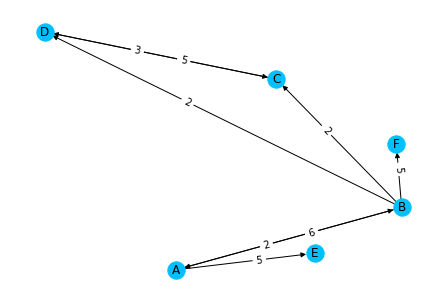

In [6]:
#Create a Toy Network
G= nx.DiGraph()
G.add_edge("A","E", weight = 5)
G.add_edge("A","B", weight = 6)
G.add_edge("B","A", weight = 2)
G.add_edge("B","F", weight = 5)
G.add_edge("B","C", weight = 2)
G.add_edge("B","D", weight = 2)
G.add_edge("C","D", weight = 3)
G.add_edge("D","C", weight = 5)
pos = nx.spiral_layout(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G,pos=pos,with_labels = True,node_color='#00c0ff')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, label_pos=0.4)

In [7]:
#In directed graphs each metric has an '_in' and '_out' suffix (see the docs)
DC = dc_all(G, normalize = False, alpha = 2)
DC = pd.DataFrame(DC).sort_index()
DC

,D1,D2,D3,D4,D5,D1_in,D2_in,D3_in,D4_in,D5_in,D1_out,D2_out,D3_out,D4_out,D5_out
A,NaN,NaN,NaN,NaN,NaN,-1.01030,-0.50515,-0.108715,0.216216,0.0625,7.68867,1.39794,16.248334,11.000000,2.00
B,NaN,NaN,NaN,NaN,NaN,0.58146,0.09691,0.372887,3.540984,0.2500,5.28043,1.59176,11.418387,7.891247,2.50
C,NaN,NaN,NaN,NaN,NaN,2.48455,0.19382,7.276891,5.216216,1.0625,0.29073,0.09691,2.334454,2.076923,0.25
D,NaN,NaN,NaN,NaN,NaN,1.08661,0.19382,4.322648,3.216216,1.0625,0.48455,0.09691,3.890756,4.310345,0.25
E,NaN,NaN,NaN,NaN,NaN,0.48455,0.09691,-0.455402,2.049180,0.2500,0.00000,0.00000,0.000000,0.000000,0.00
F,NaN,NaN,NaN,NaN,NaN,-2.52575,-0.50515,1.815890,3.378378,0.0625,0.00000,0.00000,0.000000,0.000000,0.00
